#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:

# Reading the image
img = cv2.imread("plaksha_Faculty.jpg")

if img is None:
    print("Image not found")
    exit()

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Applying the face detection method
faces_rect = face_cascade.detectMultiScale(
    gray_img,
    scaleFactor=1.05,
    minNeighbors=4,
    minSize=(25, 25),
    maxSize=(50, 50)
)

# Define the text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)      # Red in BGR
font_thickness = 1

# Iterating through detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(
        img,
        text,
        (x, y - 5),
        font,
        font_scale,
        font_color,
        font_thickness
    )

# Display the image
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

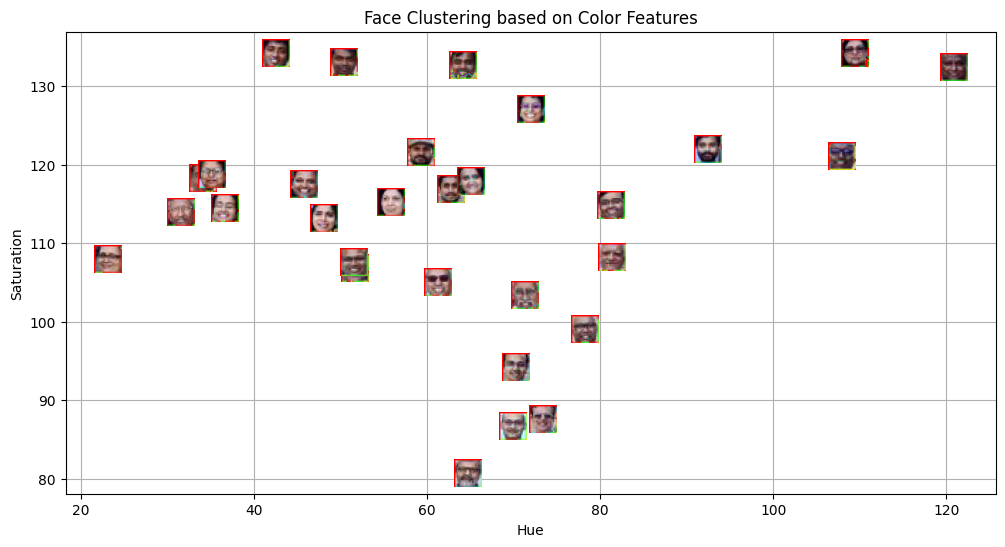

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Convert image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]

    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])

    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(
        cv2.cvtColor(
            cv2.resize(face_images[i], (20, 20)),
            cv2.COLOR_HSV2RGB
        )
    )

    ab = AnnotationBbox(
        im,
        (hue_saturation[i, 0], hue_saturation[i, 1]),
        frameon=False,
        pad=0
    )

    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Color Features")
plt.grid()
plt.show()

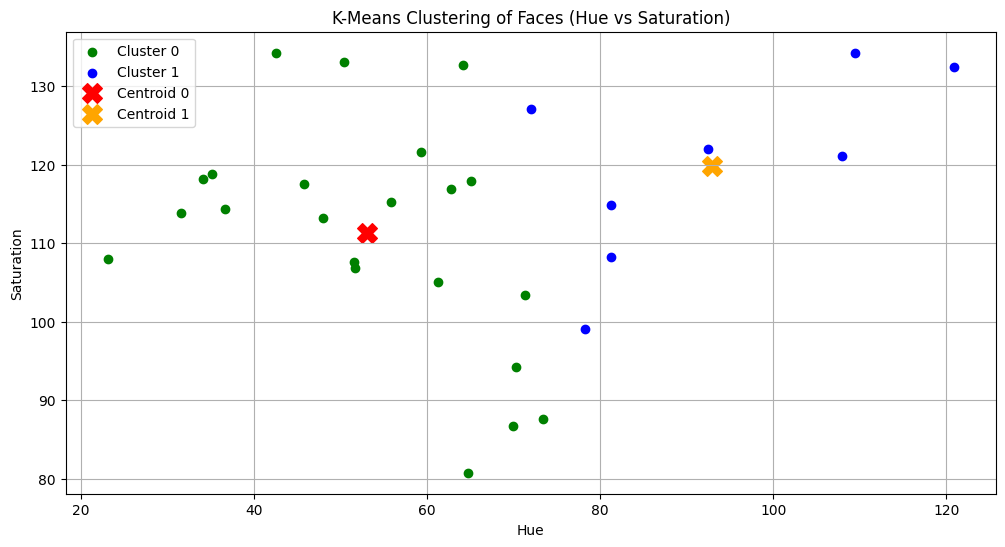

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', s=200, marker='X', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', s=200, marker='X', label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("K-Means Clustering of Faces (Hue vs Saturation)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(
    cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY),
    1.05,
    4
)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Template Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

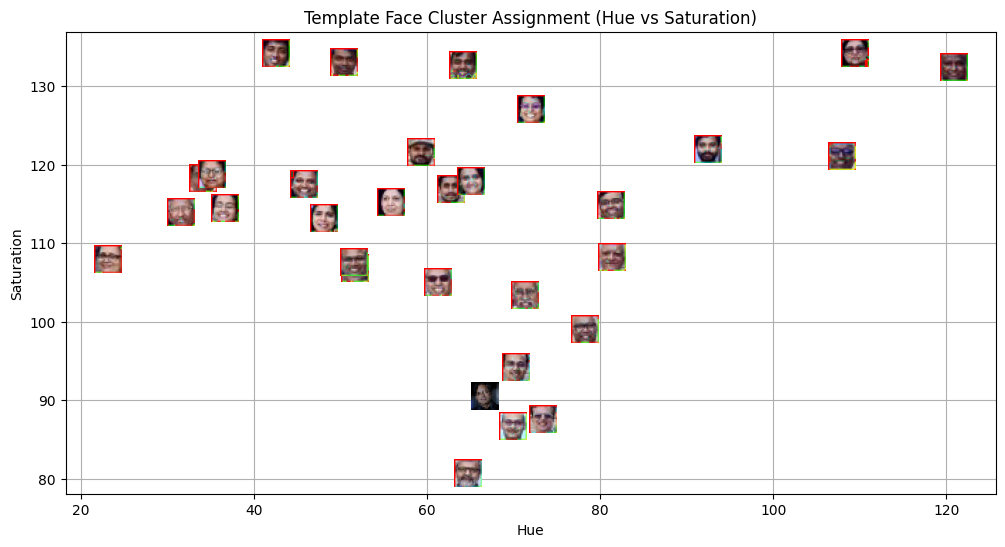

In [ ]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Face Cluster Assignment (Hue vs Saturation)")
plt.grid()
plt.show()

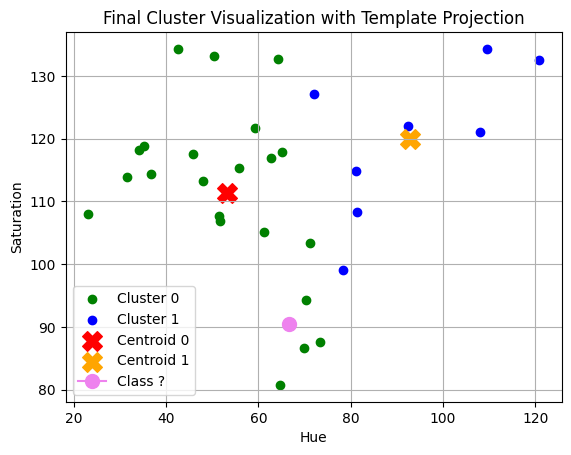

In [ ]:
# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1], color='red', s=200, marker='X', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', s=200, marker='X', label='Centroid 1')

plt.plot(template_hue, template_saturation, marker='o', c='violet',
         markersize=10, label='Class ?')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Final Cluster Visualization with Template Projection")
plt.legend()
plt.grid()
plt.show()

## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

#### 1. Common distance metrics in distance-based classification

Distance-based algorithms measure similarity between data points. Different metrics define "closeness" differently.

- **Euclidean Distance**
  - Straight-line distance between two points
  - Most common for continuous numeric data
  - Sensitive to feature scale (normalization needed)

- **Manhattan Distance**
  - Sum of absolute differences
  - Works well in high-dimensional spaces
  - Less affected by outliers

- **Minkowski Distance**
  - Generalized form of Euclidean and Manhattan
  - Controlled by parameter p
  - Flexible for different geometries

- **Cosine Distance**
  - Measures angle between vectors
  - Ignores magnitude
  - Common in text and embeddings

- **Mahalanobis Distance**
  - Accounts for variance and correlation
  - Scale-invariant
  - Useful for correlated features

- **Hamming Distance**
  - Counts mismatches
  - Used for binary/categorical data

---

#### 2. Real-world applications

Distance-based classification is useful wherever similarity matters.

- Image recognition → compare visual features
- Text classification → compare document vectors
- Recommendation systems → find similar users/items
- Medical diagnosis → match patient profiles
- Face recognition → compare facial embeddings
- Anomaly detection → detect unusual patterns
- Pattern recognition → general similarity problems

---

#### 3. Distance metrics explained

- **Euclidean Distance**
  - Formula: √ Σ (xi − yi)²
  - Geometric straight-line distance
  - Requires normalized features

- **Manhattan Distance**
  - Formula: Σ |xi − yi|
  - Grid-like movement interpretation
  - Often better in high dimensions

- **Minkowski Distance**
  - Formula: (Σ |xi − yi|^p)^(1/p)
  - p = 1 → Manhattan
  - p = 2 → Euclidean

- **Cosine Distance**
  - Based on angle between vectors
  - Good for sparse/high-dimensional data
  - Popular in NLP

- **Mahalanobis Distance**
  - Uses covariance matrix
  - Corrects for scale + correlation
  - Common in statistics

- **Hamming Distance**
  - Counts differing positions
  - Suitable for binary/categorical features

---

#### 4. Role of cross-validation

Cross-validation estimates real-world model performance.

- Tests model on multiple train/test splits
- Reduces overfitting risk
- Uses data efficiently
- Provides stable accuracy estimates
- Helps choose hyperparameters (like K)

---

#### 5. Bias and variance in KNN

K controls model behavior.

- **Small K**
  - Low bias (very flexible)
  - High variance (noise-sensitive)

- **Large K**
  - Higher bias (smoother boundary)
  - Lower variance (more stable)

Trade-off → choose K that balances both.